In [1]:
import numpy as np
import energyflow as ef
import ROOT
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import time
import pickle
import os
import itertools
import csv

Welcome to JupyROOT 6.18/00


In [2]:
jetm_lb = [ 2, 
            2, 3, 
            2, 3, 3, 4, 4, 
            2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 
            2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6]
graphs = [[(0,1)], 
          [(0,1),(0,1)], [(0,1),(0,2)], 
          [(0,1),(0,1),(0,1)], [(0,1),(1,2),(0,2)], [(0,1),(0,1),(0,2)], 
          [(0,1),(0,2),(0,3)], [(0,1),(1,2),(0,3)], 
          [(0,1),(0,1),(0,1),(0,1)], [(0,1),(0,1),(0,2),(0,2)], [(0,1),(1,2),(1,2),(0,2)], 
          [(0,1),(0,1),(0,1),(0,2)], [(0,1),(1,2),(2,3),(3,0)], [(0,1),(0,1),(0,2),(0,3)], 
          [(0,1),(0,1),(0,2),(1,3)], [(0,1),(1,2),(2,3),(3,1)], [(0,1),(0,1),(0,2),(2,3)], 
          [(0,1),(0,2),(0,3),(0,4)], [(0,1),(0,2),(0,3),(1,4)], [(0,1),(0,2),(1,3),(2,4)], 
          [(0,1),(0,1),(0,1),(0,1),(0,1)],
          [(0,1),(0,2),(1,2),(1,2),(1,2)], [(0,1),(0,1),(0,2),(1,2),(1,2)], 
          [(0,1),(0,1),(0,1),(0,1),(0,2)], [(0,1),(0,1),(0,1),(0,2),(0,2)], 
          [(0,1),(0,2),(2,1),(3,1),(3,2)], [(0,1),(0,1),(0,1),(0,3),(0,2)], 
          [(0,1),(0,1),(0,3),(0,2),(0,2)], [(0,1),(0,1),(0,1),(0,2),(1,3)],
          [(0,1),(0,1),(2,1),(2,3),(3,1)], [(0,1),(2,1),(3,1),(3,2),(3,2)],
          [(0,1),(2,1),(3,1),(3,2),(1,2)], [(0,1),(0,2),(0,2),(1,3),(1,3)],
          [(0,1),(2,1),(3,2),(3,0),(1,2)], [(0,1),(0,1),(0,2),(0,2),(1,3)],
          [(0,1),(0,2),(0,2),(0,2),(1,3)], [(0,1),(1,2),(2,3),(3,4),(4,0)],
          [(0,1),(0,1),(0,2),(0,3),(0,4)], [(0,1),(0,2),(1,2),(0,3),(0,4)],
          [(0,1),(0,1),(1,2),(0,3),(0,4)], [(0,1),(1,2),(1,2),(0,3),(0,4)],
          [(0,1),(2,1),(3,1),(3,2),(3,4)], [(0,1),(0,2),(1,3),(3,2),(3,4)],
          [(0,1),(0,2),(1,2),(0,3),(3,4)], [(0,1),(0,2),(0,2),(0,3),(1,4)],
          [(0,1),(0,1),(1,2),(0,3),(3,4)], [(0,1),(1,2),(1,2),(0,3),(3,4)],
          [(0,1),(0,2),(0,3),(0,4),(0,5)], [(0,1),(0,2),(0,3),(1,4),(1,5)],
          [(0,1),(0,2),(0,3),(0,4),(1,5)], [(0,1),(0,2),(1,3),(1,4),(2,5)],
          [(0,1),(0,2),(0,3),(1,4),(2,5)], [(0,1),(1,2),(0,3),(3,4),(4,5)]]

In [3]:
efps = [ef.EFP(graph, measure='hadr', beta=1, normed=True) for graph in graphs]

In [4]:
mc_f = ROOT.TFile("jettrack_tree_DL.root")
mc_t = mc_f.Get("jet_track_tree")

In [7]:
# dumped
csvfile = "jettrack_tree_DL.csv"
if os.path.exists(csvfile):
    os.remove(csvfile)
mc_events = []
mc_jetm = []
mc_pttot = []
weight = []
w_ev_head = []
weight_tmp = 0
i = 0
for e in mc_t:
    if e.jetm > 0:
        n = e.jetm
        if e.pt > 20: 
            ev = 1
            mc_jetm.append(n)
            mc_pttot.append(e.pt)
#             if weight_tmp != e.w:
#                 w_ev_head.append(i)
#                 weight.append(e.w)
#                 weight_tmp = e.w
        else: ev = 0
        ls = []
    elif n >= 0:
#         ls.append([e.pt, e.eta, e.phi])
        n -= 1
    if n == 0 and ev == 1:
        if i%10000 == 0: print(i)
#         with open('jettrack_tree_DL.csv','a') as fd:
#             writer = csv.writer(fd,  quoting = csv.QUOTE_MINIMAL)
#             writer.writerow(ls)
#         mc_events.append(ls)
        i += 1
mc_jetm = np.array(mc_jetm)
mc_pttot = np.array(mc_pttot)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [87]:
with open('weights.pkl') as f:
    weight, w_ev_head = pickle.load(f)

In [12]:
# with open('weights.pkl', 'w') as f:  
#     pickle.dump([weight, w_ev_head], f)

In [8]:
# with open('newmc_jetm_pttot.pkl', 'w') as f:  
#     pickle.dump([mc_jetm, mc_pttot], f)

In [9]:
with open('newmc_jetm_pttot.pkl') as f:
    mc_jetm, mc_pttot = pickle.load(f)

In [ ]:
# with open('jettrack_tree_DL.csv', 'rt') as f:
#     reader = csv.reader(f)
#     mc_events = list(reader)
# # for i in range(len(mc_events)):
# #     for j in range(len(mc_events[i])):
# #         mc_events[i][j] = mc_events[i][j].replace('[','')
# #         mc_events[i][j] = mc_events[i][j].replace(']','')
# #         mc_events[i][j] = mc_events[i][j].split(",")
# #         mc_events[i][j] = map(float,mc_events[i][j])

In [5]:
# dumped
mc_results = []

print("{:15} {:15} {:15}".format('graph_number','degree','runtime(s)'))
for i in range(len(efps)):
    results_tmp = []
    start = time.time()
    for j in range(len(mc_events)):
        results_tmp.append(efps[i].compute(mc_events[j]))
    end = time.time()
    if i<1: deg = 1
    elif i<3: deg = 2
    elif i<8: deg = 3
    elif i<20: deg = 4
    elif i<53: deg = 5
    else: deg = -999
    print("{:<15} {:<15} {:<15.03f}".format(i, deg, end - start))
    np_res_tmp = np.array(results_tmp)
    mc_results.append(np_res_tmp)
mc_results = np.array(mc_results)

graph_number    degree          runtime(s)     
0               1               169.427        
1               2               190.747        


KeyboardInterrupt: 

In [10]:
with open('newmc_res_0') as f:
    mc_res0 = pickle.load(f)

In [11]:
print(mc_res0)

[0.17533169 0.03547543 0.14383226 ... 0.09555616 0.14698063 0.09156744]


In [16]:
with open('objs.pkl') as f:  
    events, _, jetm, _, results, _, pttot, _ = pickle.load(f)
f.close()

In [13]:
xlim = [0.4, 0.15, 0.1, 0.04, 0.02, 0.03, 0.03, 0.02, 0.02, 0.01,
        0.01, 0.02, 0.01, 0.015, 0.010, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.006, 0.0015, 0.0015, 0.003, 0.003, 0.001, 0.0025, 0.0025, 0.002, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.0005, 0.0005,
        0.0005, 0.0005, 0.0005]

In [19]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

In [91]:
print w_ev_head
print weight
print len(w_ev_head)

[0, 1190, 30770, 285964, 711631, 1463258]
[4.644728903713258e-07, 4.6525318708745544e-08, 3.051698893585808e-09, 4.989541002586861e-10, 6.533287799648235e-11, 1.928295197128893e-11]
6


4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890

4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890371e-07
4.64472890

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187

4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
4.65253187087e-08
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889

3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889

3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889

3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889359e-09
3.05169889

KeyboardInterrupt: 

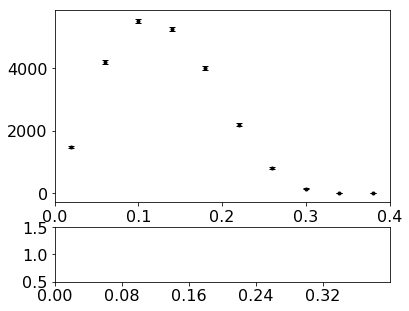

In [108]:
# 53

for i in range(1):
    mc = mc_res0[np.logical_and.reduce((mc_jetm >= jetm_lb[i], mc_pttot<80))]
#     mc_res = mc_res0
#     directory = 'basis_mc_notptscaled/'
#     if not os.path.exists(directory):
#         os.makedirs(directory)
    fig, (ax, ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3.5, 1]}, figsize=(6,5))
#     mean = np.mean(results[i][jetm >= jetm_lb[i]])
#     mc_mean = np.mean(mc_results[i][mc_jetm >= jetm_lb[i]])
    
#     if i<1: deg = 1
#     elif i<3: deg = 2
#     elif i<8: deg = 3
#     elif i<20: deg = 4
#     elif i<53: deg = 5
    bins = np.linspace(0, xlim[i], 11)
    bin_centres = (bins[:-1] + bins[1:])/2
    ax.set_xlim(0, xlim[i])
    ax1.set_xlim(0, xlim[i])
    ax1.set_ylim(0.5,1.5)
    
    plt.xticks(np.arange(0, xlim[i], xlim[i]/5))
    
    
#         for data
    data = results[i][np.logical_and(jetm >= jetm_lb[i], pttot<80)]
    counts, _ = np.histogram(data, bins)
    err = np.sqrt(counts)
    ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts), fmt = '.k', capsize=3, label = "data")
#         for mc
    mc_counts, _ = np.histogram([], bins)
    for j in range(len(mc)):
        mc_counts_tmp, _ = np.histogram(mc[j], bins)
        for k in range(len(w_ev_head)):
            if k == len(w_ev_head)-1:
                if j >= w_ev_head[k]:
                    w = weight[k]
            else:
                if j >= w_ev_head[k] and j < w_ev_head[k+1]:
                    w = weight[k]
        print(w)
        mc_counts_tmp = np.multiply(mc_counts_tmp, w)
        mc_counts = np.add(mc_counts, mc_counts_tmp)
#     mc = mc_res[np.logical_and.reduce((mc_jetm >= jetm_lb[i], mc_pttot<80))]
#     mc_counts, _ = np.histogram(mc, bins)
    scaled_mc = counts.sum()/mc_counts.sum()*mc_counts
    ax.hist(bin_centres, weights = scaled_mc, bins = bins, label = "MC")
    ax.axes.get_xaxis().set_visible(False)
    
    ax.legend(prop={'size': 14}, loc='upper right')
#     adding stuff
#     mean = "{:.2e}".format(mean)
#     mc_mean = "{:.2e}".format(mc_mean)
#     plt.figtext(.96, .9, 'mean(data)='+ mean, fontsize = 16, ha = 'right')
#     plt.figtext(.96, .85, 'mean(mc)='+ mc_mean, fontsize = 16, ha = 'right')
#     plt.figtext(.55, .73, 'd='+str(deg), fontsize = 16)
    plt.tight_layout()
    im = plt.imread('graphs/' + str(i) + '.png')
    newax = fig.add_axes([0.76, .6, 0.2, 0.2], zorder=1)
    newax.imshow(im)
    newax.axis('off')
#     ratio
    counts = counts.astype(float)
    ratio = np.divide(counts, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
    ratio_err = np.divide(err, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
    ax1.errorbar(bin_centres, ratio, yerr = ratio_err, fmt = '.k', capsize=3)
    ax1.set_yticks(np.arange(0.5, 1.5, 0.25), minor=True)
    ax1.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.7, which='both')
    plt.subplots_adjust(hspace = 0.1)
    
#     plt.savefig(directory + str(i) + '.png', dpi = 300)
# 
    plt.show()

    plt.close('all')

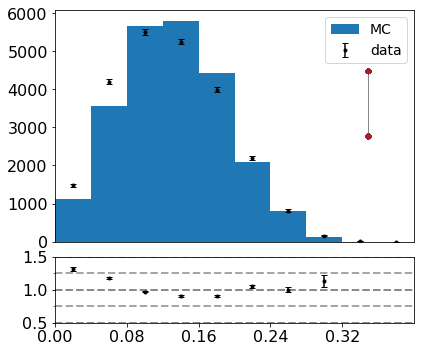

In [104]:
fig, (ax, ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3.5, 1]}, figsize=(6,5))
#     mean = np.mean(results[i][jetm >= jetm_lb[i]])
#     mc_mean = np.mean(mc_results[i][mc_jetm >= jetm_lb[i]])

#     if i<1: deg = 1
#     elif i<3: deg = 2
#     elif i<8: deg = 3
#     elif i<20: deg = 4
#     elif i<53: deg = 5
bins = np.linspace(0, xlim[i], 11)
bin_centres = (bins[:-1] + bins[1:])/2
ax.set_xlim(0, xlim[i])
ax1.set_xlim(0, xlim[i])
ax1.set_ylim(0.5,1.5)

plt.xticks(np.arange(0, xlim[i], xlim[i]/5))


#         for data
data = results[i][np.logical_and(jetm >= jetm_lb[i], pttot<80)]
counts, _ = np.histogram(data, bins)
err = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts), fmt = '.k', capsize=3, label = "data")
scaled_mc = counts.sum()/mc_counts.sum()*mc_counts
ax.hist(bin_centres, weights = scaled_mc, bins = bins, label = "MC")
ax.axes.get_xaxis().set_visible(False)

ax.legend(prop={'size': 14}, loc='upper right')
#     adding stuff
#     mean = "{:.2e}".format(mean)
#     mc_mean = "{:.2e}".format(mc_mean)
#     plt.figtext(.96, .9, 'mean(data)='+ mean, fontsize = 16, ha = 'right')
#     plt.figtext(.96, .85, 'mean(mc)='+ mc_mean, fontsize = 16, ha = 'right')
#     plt.figtext(.55, .73, 'd='+str(deg), fontsize = 16)
plt.tight_layout()
im = plt.imread('graphs/' + str(i) + '.png')
newax = fig.add_axes([0.76, .6, 0.2, 0.2], zorder=1)
newax.imshow(im)
newax.axis('off')
#     ratio
counts = counts.astype(float)
ratio = np.divide(counts, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
ratio_err = np.divide(err, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
ax1.errorbar(bin_centres, ratio, yerr = ratio_err, fmt = '.k', capsize=3)
ax1.set_yticks(np.arange(0.5, 1.5, 0.25), minor=True)
ax1.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.7, which='both')
plt.subplots_adjust(hspace = 0.1)

#     plt.savefig(directory + str(i) + '.png', dpi = 300)
# 
plt.show()

# plt.close('all')

In [98]:
mc_counts.sum()

0.002978476584337284

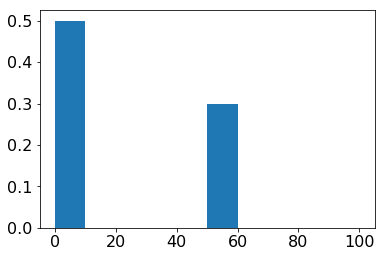

In [83]:

bins = np.linspace(0, 100, 11)
bin_centres = (bins[:-1] + bins[1:])/2
res, _ = np.histogram([], bins)
test, _ = np.histogram(1, bins)
test2, _ = np.histogram(53, bins)
test = np.multiply(test, 0.5) 
res = np.add(test, res)
test2 = np.multiply(test2, 0.3)
res = np.add(test2, res)
# ax.hist(bin_centres, weights = scaled_mc, bins = bins, label = "MC")
plt.hist(bin_centres, weights = res, bins = bins)
plt.show()

In [84]:
print res

[0.5 0.  0.  0.  0.  0.3 0.  0.  0.  0. ]


In [62]:
test2, _ = np.histogram([30 for i in range(10)], bins)
test
+= test2*0.1
plt.hist(bin_centres, weights = test*0.1, bins = bins)
plt.show()

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'